# Insurance Part 2

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

### Import Data and Explore

In [2]:
ins = pd.read_csv('insurance.csv')

In [3]:
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [5]:
# Check for missing values
ins.isnull().sum(axis = 0)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Preprocessing

In [6]:
# Encode categorical columns
encoder = LabelEncoder()
ins['sex'] = encoder.fit_transform(ins['sex'])
ins['smoker'] = encoder.fit_transform(ins['smoker'])
ins['region'] = encoder.fit_transform(ins['region'])

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(ins)

### KMeans

In [8]:
ssq = {}
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i,random_state=0).fit(X)
    ssq[i] = kmeans.inertia_
    print('i:', i)
    print('inertia: ',kmeans.inertia_)

i: 1
inertia:  9366.0
i: 2
inertia:  7190.047292076327
i: 3
inertia:  6124.909858706683
i: 4
inertia:  5593.858693680095
i: 5
inertia:  5142.891235307268
i: 6
inertia:  4762.082131025635
i: 7
inertia:  4390.514136107834
i: 8
inertia:  4104.203720482316
i: 9
inertia:  3940.126113750299
i: 10
inertia:  3706.5365443563487
i: 11
inertia:  3570.416135267326
i: 12
inertia:  3435.3273728314366
i: 13
inertia:  3300.5757338378244
i: 14
inertia:  3182.187745827957
i: 15
inertia:  3047.808709716881
i: 16
inertia:  2974.240346800611
i: 17
inertia:  2878.1328350966505
i: 18
inertia:  2735.2421551986527
i: 19
inertia:  2672.4372774262597
i: 20
inertia:  2600.2752835689025


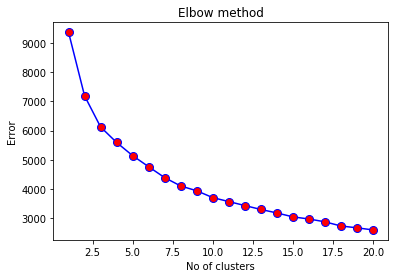

In [9]:
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.plot(list(ssq.keys()),list(ssq.values()),linestyle ='-',marker='o',color='b',markersize=8,markerfacecolor='r')

In [10]:
# k = 10
KMeansModel = KMeans(n_clusters=10,random_state=0)
y = KMeansModel.fit_predict(X)

In [11]:
centers = KMeansModel.cluster_centers_
centers

array([[ 0.10219581,  0.30342185,  0.82583779,  0.09083647,  1.97058663,
         0.22701191,  2.37407972],
       [-1.04817487, -1.0105187 , -0.23749371, -0.5719331 , -0.5074631 ,
        -0.08405639, -0.74773911],
       [ 0.53870993,  0.98959079,  0.89552119,  0.03894153, -0.5074631 ,
         0.86872485, -0.28020841],
       [-0.20216712,  0.00424274, -0.80210752, -0.084869  ,  1.97058663,
        -0.24722041,  0.73047772],
       [ 0.71990128, -1.0105187 ,  0.2728248 , -0.35538268, -0.5074631 ,
         0.97191442, -0.21970307],
       [-0.24103335,  0.98959079, -0.3860374 ,  1.50697904, -0.5074631 ,
        -0.44898658, -0.43062467],
       [ 0.98271193,  0.98959079, -0.19021902, -0.53073715, -0.5074631 ,
        -0.71752006, -0.0804851 ],
       [ 0.02086014, -1.0105187 ,  0.01572701,  1.50938727, -0.4861006 ,
         0.20433678, -0.29917648],
       [-1.02466163,  0.98959079, -0.34898067, -0.60823979, -0.5074631 ,
        -0.01143314, -0.79354353],
       [ 0.83578001, -1.0105

### Mean-shift

In [12]:
ms = MeanShift(bandwidth=1)
clusters=ms.fit(X)
labels = ms.labels_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("number of estimated clusters: %d" % n_clusters_)

number of estimated clusters: 218


In [13]:
ms = MeanShift(bandwidth=0.5)
clusters=ms.fit(X)
labels = ms.labels_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("number of estimated clusters: %d" % n_clusters_)

number of estimated clusters: 713


In [14]:
ms = MeanShift(bandwidth=0.25)
clusters=ms.fit(X)
labels = ms.labels_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("number of estimated clusters: %d" % n_clusters_)

number of estimated clusters: 1052
